In [170]:
import pandas as pd

data = pd.read_csv('data.csv')
df = data.copy()

df.columns = ['district', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']
        
df = df.replace(
    ['сenter', 'nw', 'south', 'caucasus', 'volga', 'ural', 'siberia', 'dv'],
    [1, 2, 3, 4, 5, 6, 7, 8])

display(df)

,district,x1,x2,x3,x4,x5,x6
0,Белгородская область,7777,14918,2825,2009,1841,1
1,Брянская область,4560,10211,1538,1418,837,1
2,Владимирская область,5802,8902,1703,1468,1186,1
3,Ивановская область,4495,5649,1338,977,1288,1
4,Калужская область,4335,7514,1569,998,689,1
...,...,...,...,...,...,...,...
67,Хабаровский край,5689,10688,1877,1648,1800,8
68,Амурская область,2954,7211,929,977,829,8
69,Магаданская область,787,1215,331,202,97,8
70,Сахалинская область,3332,4511,792,507,131,8


Декомпозирую DataFrame в трехмерный массив

In [171]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(3)
df_transformed = svd.fit_transform(df.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']])
df_transformed = pd.DataFrame(df_transformed, columns=['x1', 'x2', 'x3'])

display(df_transformed.shape)

(72, 3)

<Axes: xlabel='x1', ylabel='x2'>

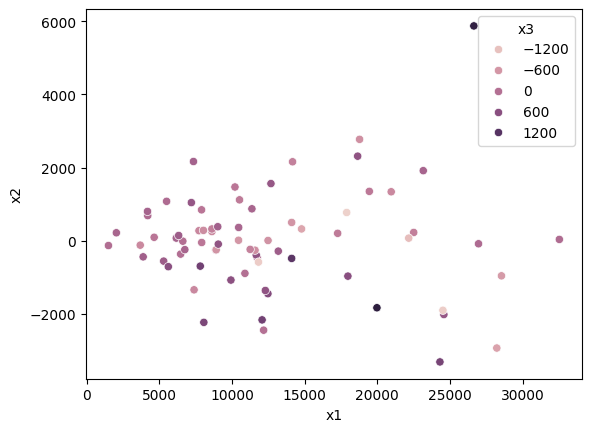

In [172]:
import seaborn as sns

sns.scatterplot(data = df_transformed, x='x1', y='x2', hue='x3')

Кластеризация K-means

<Axes: xlabel='x1', ylabel='x2'>

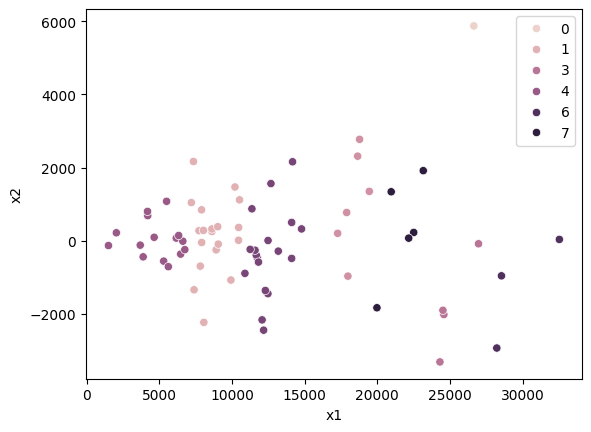

In [173]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, n_init='auto')
kmeans.fit(df_transformed)

sns.scatterplot(data=df_transformed, x='x1', y='x2', hue=kmeans.labels_)

Классификация K-neighbours

In [174]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(df.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']], df.loc[:, 'x6'])

KNeighborsClassifier(n_neighbors=7)

In [175]:
dv = df.loc[df['x6'] == 8]

for i in range(len(df.loc[:, 'x6'])):
    if df['x6'][i] == 8:
        df.drop(i, inplace=True)
        
display(dv)

,district,x1,x2,x3,x4,x5,x6
62,Республика Бурятия,3377,9471,1806,1285,768,8
63,Республика Саха (Якутия),6770,17212,2850,1474,1169,8
64,Забайкальский край,4672,11712,1550,1178,781,8
65,Камчатский край,2202,3129,783,341,132,8
66,Приморский край,6485,12822,2049,1812,2380,8
67,Хабаровский край,5689,10688,1877,1648,1800,8
68,Амурская область,2954,7211,929,977,829,8
69,Магаданская область,787,1215,331,202,97,8
70,Сахалинская область,3332,4511,792,507,131,8
71,Еврейская автономная область,803,1875,175,187,57,8


Результат классификации на ДФО

In [181]:
pred = neigh.predict(dv.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']])
dv.reset_index(drop= True , inplace= True )

for i in range(len(pred)):
    dv.loc[i, 'x6'] = pred[i]
    
display(dv)

,district,x1,x2,x3,x4,x5,x6
0,Республика Бурятия,3377,9471,1806,1285,768,1
1,Республика Саха (Якутия),6770,17212,2850,1474,1169,3
2,Забайкальский край,4672,11712,1550,1178,781,1
3,Камчатский край,2202,3129,783,341,132,3
4,Приморский край,6485,12822,2049,1812,2380,1
5,Хабаровский край,5689,10688,1877,1648,1800,5
6,Амурская область,2954,7211,929,977,829,1
7,Магаданская область,787,1215,331,202,97,3
8,Сахалинская область,3332,4511,792,507,131,2
9,Еврейская автономная область,803,1875,175,187,57,3


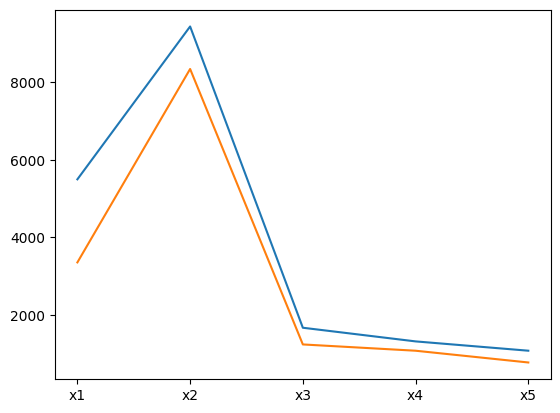

In [190]:
import matplotlib.pyplot as plt

plt.plot(df.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']].median())
plt.plot(dv.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']].median())

plt.show()